In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [2]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:08<00:00, 1.15MB/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 116kB/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:02<00:00, 685kB/s] 


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=32,
                         shuffle=True,
                         num_workers=1),
    'test' : DataLoader(test_data,
                         batch_size=32,
                         shuffle=True,
                         num_workers=1) 
}



In [5]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x16beb0b8210>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x16bae1aad90>}

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
    
        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        
        self.conv2_drop = nn.Dropout2d()
        
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,training = self.training)
        x = self.fc2(x)
        
        return F.softmax(x)
    
    
        

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optimiser = torch.optim.Adam(model.parameters(),lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

In [27]:
def train(epoch):
    model.train()
    
    for batch_idx,(data,target) in enumerate(loaders['train']):
        data, target = data.to(device),target.to(device)
        
        optimiser.zero_grad()
        
        output = model(data)
        loss = loss_fn(output,target)
        loss.backward()
        optimiser.step()
        
        if batch_idx%20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} 'f'({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')
            
            
def test():
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data,target in loaders['test']:
            data,target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output,target).item()
            pred = output.argmax(dim=1, keepdim = True)
            correct +=pred.eq(target.view_as(pred)).sum().item()
            
    
    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} '
          f'({100. * correct / len(loaders["test"].dataset):.0f}%)\n')
            

In [29]:
for epoch in range(1,11):
    train(epoch)
    test()


C:\Users\Harish K B\AppData\Local\Temp\ipykernel_1660\1210779670.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 1.534867
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.554275
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.463937
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.623273
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.527627
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.527287
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.612456
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.488185
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.549537
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.557469
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.479028
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.624438
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.478295
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.525396
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.528877
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.587269
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.648571
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.642602
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.504439
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.702153
Train Epoch: 1 [12800/60000 (

Prediction : tensor([[7]], device='cuda:0')


C:\Users\Harish K B\AppData\Local\Temp\ipykernel_1660\1210779670.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


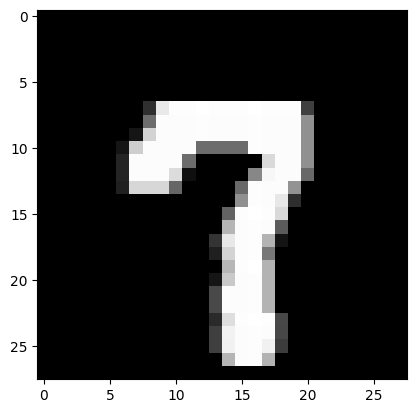

In [53]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[torch.randint(0,9999,(1,))[0]]

data = data.unsqueeze(dim=1).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).to(device)

print(f"Prediction : {prediction}")

image = data.squeeze().cpu().numpy()

plt.imshow(image,cmap='gray')

In [72]:
import os
path = os.path.join(os.getcwd(),'model','MNIST_model.pt')

In [85]:
torch.save(
    {
        'model_state_dict': model.state_dict(),
        'optimiser_state_dict': optimiser,
        'loss': loss_fn
    },
    path)

In [90]:
checkpoint = torch.load(path)
loaded_model = CNN()
loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_model.eval()
loaded_model.to(device)

C:\Users\Harish K B\AppData\Local\Temp\ipykernel_1660\1946301000.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

Prediction : tensor([[2]], device='cuda:0')


C:\Users\Harish K B\AppData\Local\Temp\ipykernel_1660\1210779670.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


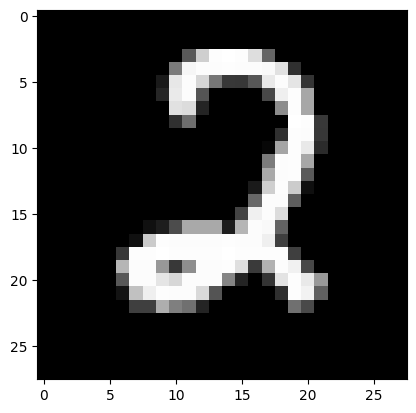

In [94]:
import matplotlib.pyplot as plt

loaded_model.eval()

data, target = test_data[torch.randint(0,9999,(1,))[0]]

data = data.unsqueeze(dim=1).to(device)

output = loaded_model(data)

prediction = output.argmax(dim=1, keepdim=True).to(device)

print(f"Prediction : {prediction}")

image = data.squeeze().cpu().numpy()

plt.imshow(image,cmap='gray')